In [1]:
from scipy import linalg
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets

To print nicely:

In [2]:
sm.init_printing(use_unicode=True)

# The basic Solow model

The basic Solow model is as follows:

\begin{equation}
Y_t = BK_t^{\alpha}L_t^{1-\alpha} \tag{1}
\end{equation}
\begin{equation}
r_t = \alpha B \left(\frac{K_t}{L_t}\right)^{\alpha-1} \tag{2}
\end{equation}
\begin{equation}
w_t = (1-\alpha) B \left(\frac{K_t}{L_t}\right)^{\alpha-1} \tag{3}
\end{equation}
\begin{equation}
S_t = sY_t \tag{4}
\end{equation}
\begin{equation}
K_{t+1} - K_t = S_t -\delta K_t \tag{5}
\end{equation}
\begin{equation}
L_{t+1} = (1-n)L_t \tag{6}
\end{equation}

We also define the following equations:
\begin{equation}
y_t = \frac{Y_t}{L_t} = Bk_t^{\alpha}
\end{equation}
\begin{equation}
k_t = \frac{K_t}{L_t}
\end{equation}

In [188]:
sm.solve(s*B*k**alpha -delta*k +k - K, K)

## Defining symbols

First we define the necessary variables so we can use sympy:

In [98]:
Y = sm.symbols("Y_t")
y = sm.symbols("y_t")
K = sm.symbols("K_t")
k = sm.symbols("k_t")
r = sm.symbols("r_t")
w = sm.symbols("w_t")
s = sm.symbols("s")
n = sm.symbols("n")
g = sm.symbols("g")
B = sm.symbols("B")
L = sm.symbols("L_t")
alpha = sm.symbols("alpha")
delta = sm.symbols("delta")
kstar = sm.symbols("k_t^*")
ystar = sm.symbols("y^*")

It is easy to validate equation (2) and (3) by differentiating equation with respect to respectively $K_t$ and $L_t$:

$r_t$:

In [95]:
sm.simplify(sm.diff(B*K**alpha*L**(1-alpha), K))

$w_t$:

In [96]:
sm.simplify(sm.diff(B*K**alpha*L**(1-alpha), L))

## Solving for steady state

We find the steady state by solving the equation $k_{t+1}-k_t = \frac{1}{1+n} (sBk_t^{\alpha} -(n+\delta)k_t)$ for the constant solution where $k_{t+1} = k_t = k^*$. This gives us the equation $sBk^{\alpha} - (n-\delta)k = 0$ to solve.

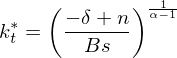

In [104]:
ksteady = sm.solve(s*B*k**alpha-(n-delta)*k, k)[0]
sm.Eq(kstar , ksteady)

This helps us solving for $y^*$:

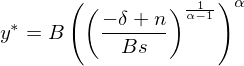

In [119]:
eq1 = sm.simplify(B*ksteady**alpha)
sm.Eq(ystar, eq1)

## Simulating the basic Solow Model

In [280]:
def simulate_basic(k,alpha,delta,s,n,B,T):
    
    k_path = [k]
    Degreeline = [0]
    for t in range(1,T):
        line = (n + delta)*t
        Degreeline.append(line)
        
    for t in range(1,T):
        k_plus = s*B*t**alpha
        k_path.append(k_plus)
    
    
    plt.figure(figsize=(5,5))
    plt.plot(k_path[:T], label='$sBk_t^{\u03B1}$')
    plt.plot(Degreeline[:T], label = '$(n+\delta)k_t$')
    plt.xlim(0,T)
    plt.ylim(0,Degreeline[-1])
    plt.xlabel('$k_t$')
    plt.grid(True)
    plt.legend()
    
    return plt.show()

Example on a simulation with reasonable values:

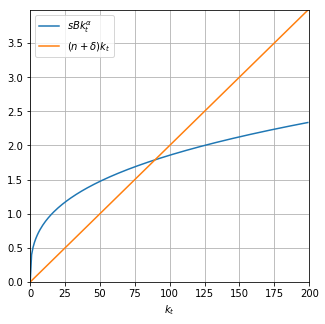

In [281]:
simulate_basic(0,1/3,0.01,0.4,0.01,1,200)

Below, you can try changing the parametres yourself to see how they influence the steady state.

In [283]:
widgets.interact(simulate_basic, 
                k = widgets.fixed(0), 
                alpha = widgets.FloatSlider(description = '$\u03B1$' , min = 0 , max = 0.9 , step = 0.05 , value = 0.3),
                delta = widgets.FloatSlider(description = '$\u03B4$' , min = 0 , max = 0.1 , step = 0.01 , value = 0.01),
                s = widgets.FloatSlider(description = 's' , min = 0.01 , max = 0.8 , step = 0.05 , value = 0.4),
                n = widgets.FloatSlider(description ='$n$', min = 0.01 , max = 0.1 , step = 0.005, value = 0.01),
                B = widgets.fixed(1),
                T = widgets.IntSlider(description='$T$' , min = 1, max = 1000, step = 10, value = 100))

interactive(children=(FloatSlider(value=0.3, description='$α$', max=0.9, step=0.05), FloatSlider(value=0.01, d…

<function __main__.simulate_basic(k, alpha, delta, s, n, B, T)>

# The solow model with Human Capital

The Solow model with human capital is as follows:

\begin{equation}
Y_t = K_t^{\alpha}H_t^{\varphi}(A_tL_t)^{1-\alpha -\varphi} \tag{1} \\
\end{equation}
\begin{equation}
r_t = \alpha \left(\frac{K_t}{A_t L_t}\right)^{\alpha -1} \left(\frac{H_t}{A_t L_t}\right)^{\varphi} \tag{2}
\end{equation}
\begin{equation}
w_t = (1-\alpha) \left(\frac{K_t}{A_tL_t}\right)^{\alpha} \left(\frac{H_t}{A_tL_t}\right)^{\varphi}A_t \tag{3}
\end{equation}
\begin{equation}
K_{t+1}-K_t = s_K Y_t - \delta K_t \quad , \quad K_0 \text{ given} \tag{4}
\end{equation}
\begin{equation}
H_{t+1}-H_t = s_H Y_t -\delta H_t \quad , \quad H_0 \text{ given} \tag{5}
\end{equation}
\begin{equation}
L_{t+1} = (1+n)L_t \quad , \quad L_0 \text{ given} \tag{6}
\end{equation}
\begin{equation}
A_{t+1} = (1+g)A_t \quad , \quad A_0 \text{ given} \tag{7}
\end{equation}

We also define the following equations:
\begin{equation}
\text{Physical capital per effective worker}: \quad \tilde{k_t} = \frac{K_t}{A_tL_t}
\end{equation}
\begin{equation}
\text{Human capital per effective worker}: \quad \tilde{h_t} = \frac{H_t}{A_tL_t}
\end{equation}
\begin{equation}
\text{Output per effective worker}: \quad \tilde{y_t} = \frac{Y_t}{A_tL_t}
\end{equation}
\begin{equation}
\tilde{y_t} = \tilde{k_t}^{\alpha} \tilde{h_t}^{\varphi}
\end{equation}

## Defining symbols

Defining all the things as symbols so we can use sympy:

In [69]:
A = sm.symbols("A_t")
sK = sm.symbols("s_K")
sH = sm.symbols("s_H")
phi = sm.symbols("varphi")
ktilde = sm.symbols("ktilde_t")
htilde = sm.symbols("htilde_t")
ytilde = sm.symbols("ytilde_t")
htilde1 = sm.symbols("htilde_t+1")
ktilde1 = sm.symbols("ktilde_t+1")
ktildestar = sm.symbols("ktilde^*")
htildestar = sm.symbols("htilde^*")
ytildestar = sm.symbols("ytilde^*")

## Solving for steady state

We will now find the steady state values for variables $\tilde{k^*}, \tilde{h^*}$ and $\tilde{y^*}$ by solving the following equations:

\begin{equation}
\tilde{k}_{t+1} - \tilde{k}_t = \frac{1}{(1+n)(1+g)}(s_K \tilde{k}_t^{\alpha} \tilde{h}_t^{\varphi} - (n+g+\delta +ng)\tilde{k}_t)
\end{equation}
\begin{equation}
\tilde{h}_{t+1} - \tilde{h}_t = \frac{1}{(1+n)(1+g)}(s_H \tilde{k}_t^{\alpha} \tilde{h}_t^{\varphi} - (n+g+\delta +ng)\tilde{h}_t)
\end{equation}

First we make variables which transform $\tilde{h}_t$ into a function og $\tilde{k}_t$ and vice verca:

In [33]:
ktildealpha = ktilde**alpha
htildephi = htilde**phi
htok = (sH/sK)*ktilde
htokphi = ((sH/sK)*ktilde)**phi
ktoh = (sK/sH)*htilde
ktohalpha = ((sK/sH)*htilde)**alpha

We set up the equation to solve for $\tilde{h}_{t+1} = \tilde{h}_t = \tilde{h}^*$:

In [9]:
eq = sm.Eq(sH*ktildealpha*htildephi - (n+g+delta+n*g)*htilde)
eq

Then we solve it for $\tilde{h}_t$:

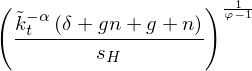

In [10]:
hisolated = sm.solve(eq,htilde)[0]
hisolated

Now we insert the transformed $\tilde{h}_t$:

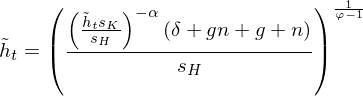

In [11]:
htildefinal = sm.Eq(htilde , ((ktoh**(-alpha)*(delta+n*g+g+n)/sH)**(1/(phi-1))))
htildefinal

And solve for the steady state:

We find that the steady state value for htilde is:


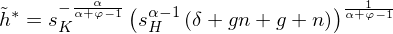

In [60]:
htildesteady = sm.solve(htildefinal,htilde)[0]
print('We find that the steady state value for htilde is:')
sm.Eq(htildestar, htildesteady)

We now do the same for $\tilde{k}_t$:

In [13]:
eq2 = sm.Eq(sK*ktildealpha*htildephi - (n+g+delta+n*g)*ktilde)
eq2

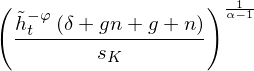

In [14]:
kisolated = sm.solve(eq2,ktilde)[0]
kisolated

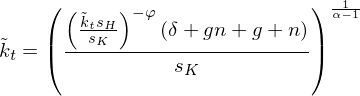

In [15]:
ktildefinal = sm.Eq(ktilde, ((htok**(-phi)*(delta+n*g+g+n)/sK)**(1/(alpha-1))))
ktildefinal

We find that the steady state value for ktilde is:


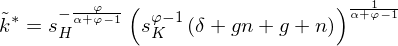

In [61]:
ktildesteady = sm.solve(ktildefinal,ktilde)[0]
print('We find that the steady state value for ktilde is:')
sm.Eq(ktildestar, ktildesteady)

Now we can plot this into $\tilde{y}^*$:

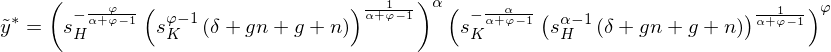

In [62]:
yfinal = sm.Eq(ytildestar, ksteady**alpha * hsteady**phi)
ytildesteady = sm.solve(yfinal, ytildestar)[0]
sm.Eq(ytildestar, sm.solve(yfinal, ytildestar)[0])

We now get that the BNP per capita in steady state must be:

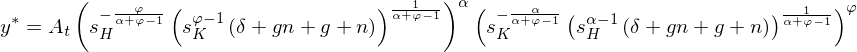

In [63]:
sm.Eq(ystar, A*ytildesteady)

We can now create a function which gives us the steady state values for chosen parameter:

In [64]:
ss_htilde = sm.lambdify((sK, sH, n, g, delta, alpha, phi), htildesteady)
ss_ktilde = sm.lambdify((sK, sH, n, g, delta, alpha, phi), ktildesteady)
ss_ytilde = sm.lambdify((sK, sH, n, g, delta, alpha, phi), ytildesteady)
def steady_states(sK, sH, n, g, delta, alpha, phi):
    
    """Returns the steady state value for human capital per effective worker.
    Args:
    sK: investments in physical income
    sH: investments in human capital
    n: increase in labour
    g: increase in technology
    delta: the depreciation rate
    alpha: return on physical capital
    phi: return on human capital
    
    Returns:
    Steady state values for h, k and y"""
    
    return print(f'Steady state for h is {ss_htilde(sK, sH, n, g, delta, alpha, phi):0.2f}'), print(f'Steady state for k is {ss_ktilde(sK, sH, n, g, delta, alpha, phi):0.2f}'), print(f'Steady state for BNP per worker is {ss_ytilde(sK, sH, n, g, delta, alpha, phi):0.2f}')

An example on finding steady states could be:

In [65]:
steady_states(0.2,0.2,0.01,0.02,0.01,1/3,1/3)

Steady state for h is 123.14
Steady state for k is 123.14
Steady state for BNP per worker is 24.75


(None, None, None)

## Simulating solow with human capital

We will now simulate the Solow model with human capital, to graphically show how to find the steady state.

In [66]:
def simulate(htilde,ktilde,alpha,phi,delta,sK,sH,n,g,T):
    """
    Args:
    htilde: initial value for human capital per effective worker
    ktilde: initial value for physical capital per effective worker
    alpha: return on physical capital
    phi: return on human capital
    delta: depreciation rate
    sK: investments in physical income
    sH: investments in human capital
    n: increase in labour
    g: increase in technology
    T: periods to simulate through
    
    Returns:
    A plot showing how the capital accumulates over time
    """
    #Making an empty list for all our future values
    htilde_path = [htilde]
    ktilde_path = [ktilde]
    
    #Adding numbers to the list using equation (5) where htilde is isolated
    for t in range(1,T):
        ktilde = t
        htilde_next = ((ktilde**(-alpha)*(delta+n*g+n+g))/sH)**(1/(phi-1))
        htilde_path.append(htilde_next)
    
    #Adding numbers to the list using equation (4) where htilde is isolated
    for t in range(1,T):
        ktilde = t
        ktilde_next = ((ktilde**(-alpha+1)*(delta+n*g+n+g))/sK)**(1/(phi))
        ktilde_path.append(ktilde_next)
    
    #Plotting it all
    plt.figure(figsize=(5,5))
    plt.plot(htilde_path[:T], label='$\Delta \~{h} = 0$')
    plt.plot(ktilde_path[:T], label='$\Delta \~{k} = 0$')
    plt.xlim(0,T)
    plt.ylim(0,T)
    plt.xlabel('$\~{k}$')
    plt.ylabel('$\~{h}$')
    plt.grid(True)
    plt.legend()
    
    return plt.show(), print(steady_states(sK, sH, n, g, delta, alpha, phi))

Example on a simulation with reasonable values:

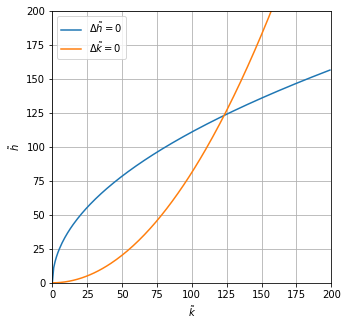

Steady state for h is 123.14
Steady state for k is 123.14
Steady state for BNP per worker is 24.75
(None, None, None)


(None, None)

In [67]:
simulate(0,0,1/3,1/3,0.01,0.2,0.2,0.01,0.02,200)

Try changing the parametres yourself to see how they influence the steady state.

In [68]:
widgets.interact(simulate, 
                 htilde = widgets.fixed(0), 
                 ktilde = widgets.fixed(0), 
                 alpha = widgets.FloatSlider(description='$\u03B1$', min=0, max=0.5, step=0.05, value=0.3),
                 phi = widgets.FloatSlider(description='$\u03C6$', min=0, max=0.5, step=0.05, value=0.3), 
                 delta = widgets.FloatSlider(description='$\u03B4$', min=0.01, max=0.1, step=0.01, value=0.01), 
                 sK = widgets.FloatSlider(description='$s_K$', min=0.1, max=0.4, step=0.01, value=0.2), 
                 sH = widgets.FloatSlider(description='$s_H$', min=0.1, max=0.4, step=0.01, value=0.2),
                 n = widgets.FloatSlider(description='$n$', min=0.01, max=0.1, step=0.005, value=0.01), 
                 g = widgets.FloatSlider(description='$g$', min=0.01, max=0.1, step=0.005, value=0.02), 
                 T = widgets.IntSlider(description='$T$', min=1, max=1000, step=10, value=100))

interactive(children=(FloatSlider(value=0.3, description='$α$', max=0.5, step=0.05), FloatSlider(value=0.3, de…

<function __main__.simulate(htilde, ktilde, alpha, phi, delta, sK, sH, n, g, T)>

# We wil now analyze an extention of the Solow model with human capital